In [169]:
import pandas as pd
from sklearn.svm import LinearSVC, SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import cm
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dropout,Dense
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM, Activation, Masking, BatchNormalization

from sklearn.metrics import confusion_matrix

In [81]:
#df=pd.read_csv('https://raw.githubusercontent.com/brendonhall/facies_classification/master/facies_vectors.csv')
#df.to_csv('facies_vectors.csv')
df=pd.read_csv('facies_vectors.csv')
df=df.dropna(axis=0)
print(df.head(3))
print(df.columns)
print("\nCreate a reservoir model of the largest gas fields in North America, the Hugoton and Panoma Fields")
print("\nFacies: The character of a rock expressed by its formation, composition, and fossil content.")

   Unnamed: 0  Facies Formation  Well Name   Depth     GR  ILD_log10  \
0           0       3     A1 SH  SHRIMPLIN  2793.0  77.45      0.664   
1           1       3     A1 SH  SHRIMPLIN  2793.5  78.26      0.661   
2           2       3     A1 SH  SHRIMPLIN  2794.0  79.05      0.658   

   DeltaPHI   PHIND   PE  NM_M  RELPOS  
0       9.9  11.915  4.6     1   1.000  
1      14.2  12.565  4.1     1   0.979  
2      14.8  13.050  3.6     1   0.957  
Index(['Unnamed: 0', 'Facies', 'Formation', 'Well Name', 'Depth', 'GR',
       'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS'],
      dtype='object')

Create a reservoir model of the largest gas fields in North America, the Hugoton and Panoma Fields

Facies: The character of a rock expressed by its formation, composition, and fossil content.


In [172]:
svm = SVC(kernel="sigmoid")
dictFacies={1:'Nonmarine sandstone',
2:'Nonmarine coarse siltstone',
3:'Nonmarine fine siltstone',
4:'Marine siltstone and shale',
5:'Mudstone (limestone)',
6:'Wackestone (limestone)',
7:'Dolomite',
8:'Packstone-grainstone (limestone)',
9:'Phylloid-algal bafflestone (limestone)'}

#https://github.com/brendonhall/facies_classification/blob/master/Facies%20Classification%20-%20SVM.ipynb

In [173]:
#df['Well Name'] = df['Well Name'].astype('category')
if "Formation" in df.columns:
    result = pd.get_dummies(df['Formation'].astype('category'))
    df=pd.concat([df,result],axis=1)
    #print(df['Well Name'].unique())
    df.drop(['Formation'],axis=1,inplace=True)

if "Well Name" in df.columns:    
    result = pd.get_dummies(df['Well Name'].astype('category'))
    df=pd.concat([df,result],axis=1)
    df.drop(['Well Name'],axis=1,inplace=True)

In [174]:
columns=[column for column in df.columns if column != "Facies"]
print(columns)
X=df[columns]
y=df["Facies"].astype("category")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

['Unnamed: 0', 'Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS', 'A1 LM', 'A1 SH', 'B1 LM', 'B1 SH', 'B2 LM', 'B2 SH', 'B3 LM', 'B3 SH', 'B4 LM', 'B4 SH', 'B5 LM', 'B5 SH', 'C LM', 'C SH', 'CHURCHMAN BIBLE', 'CROSS H CATTLE', 'LUKE G U', 'NEWBY', 'NOLAN', 'Recruit F9', 'SHANKLE', 'SHRIMPLIN']


In [181]:
svm.fit(X_train,y_train)


SVC(kernel='sigmoid')

In [158]:
def PlotBar(field):
    #plt.scatter(x=x,y=X_train["ILD_log10"])
    for facies in df["Facies"].unique():
        plt.figure(figsize=(20,2))
        filter=df["Facies"]==facies
        df[filter][field].plot(kind="bar")
        plt.title(dictFacies[facies])
        plt.xticks(rotation=90)
        plt.xticks([])
        plt.show()


Resistivity Logs measure how electricity travels through rocks and sediments. This determines what types of fluids are present because oil and fresh water are poor conductors of electricity, while formation waters are salty and easily conduct electricity.


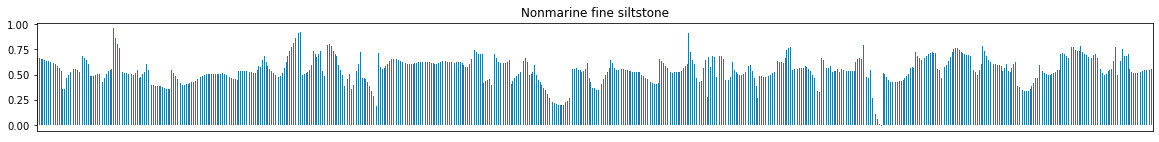

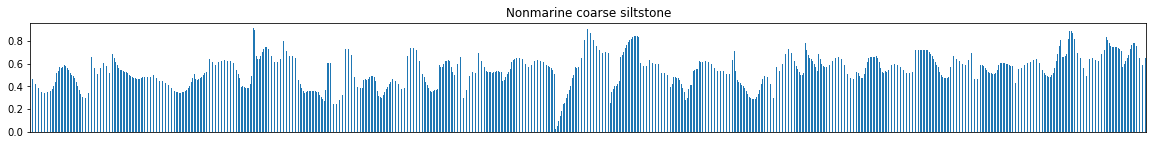

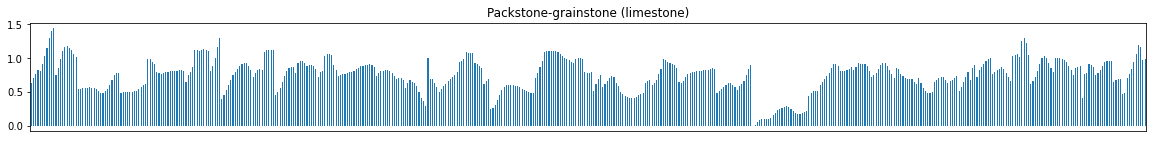

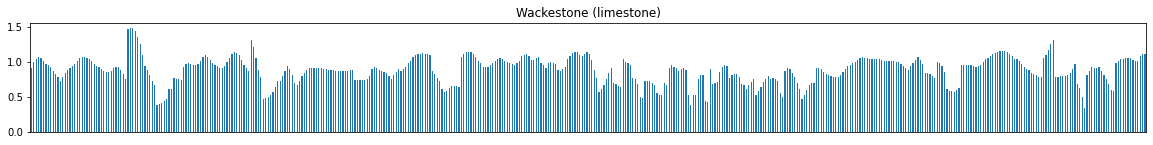

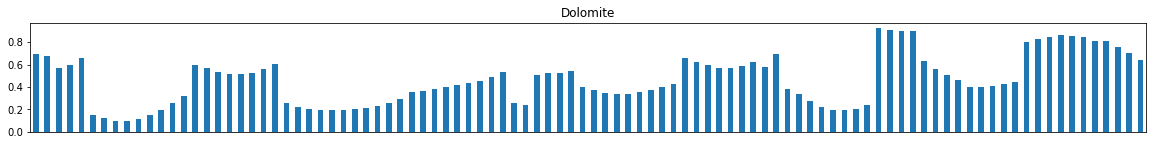

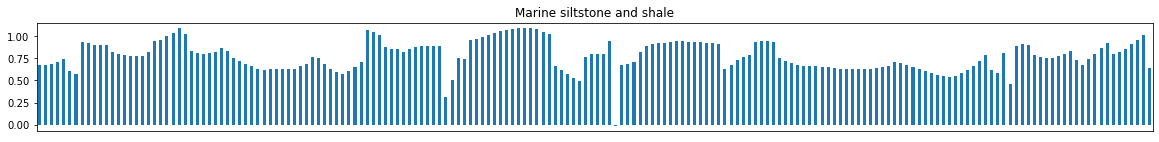

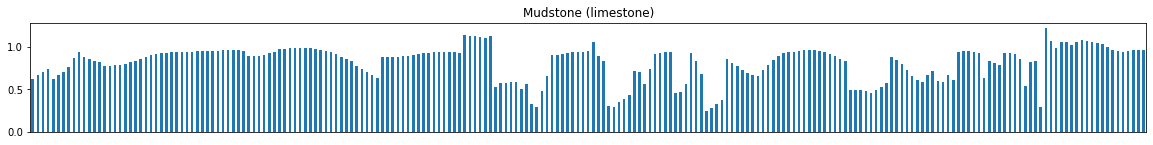

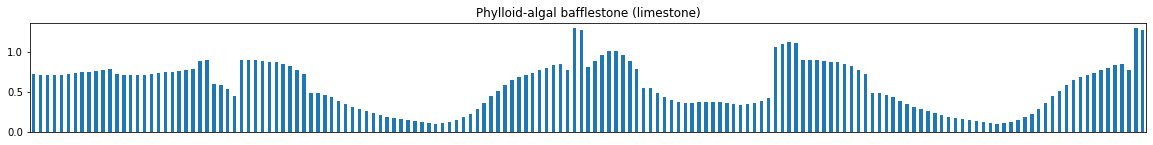

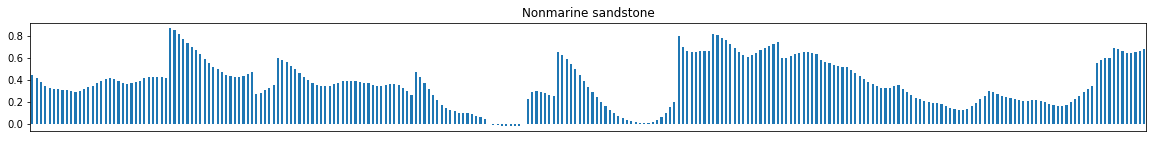

In [159]:
print("Resistivity Logs measure how electricity travels through rocks and sediments. This determines what types of fluids are present because oil and fresh water are poor conductors of electricity, while formation waters are salty and easily conduct electricity.")
x=np.linspace(1,len(X_train),len(X_train))
#print(x)
PlotBar("ILD_log10")


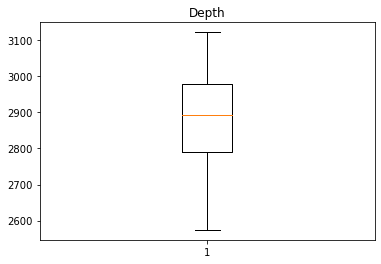

In [175]:
plt.boxplot(X_train["Depth"])
plt.title("Depth")
plt.show()
#PlotBar("Depth")

In [176]:
print("\ngamma ray (GR)")
print("\nResistivity logging (ILD_log10)")
print("\nPhotoelectric effect (PE)")
print("\nNeutron-density porosity difference DeltaPHI")
print("\nAverage neutron-density porosity PHIND")


gamma ray (GR)

Resistivity logging (ILD_log10)

Photoelectric effect (PE)

Neutron-density porosity difference DeltaPHI

Average neutron-density porosity PHIND


Gamma ray logs are used primarily to distinguish clean, potentially productive intervals from probable unproductive shale intervals. The measurement is used to locate shale beds and quantify shale volume. Clay minerals are formed from the decomposition of igneous rock.


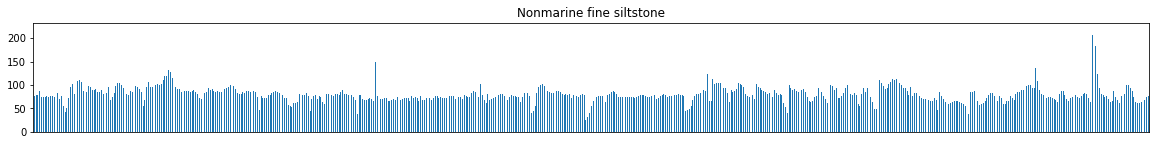

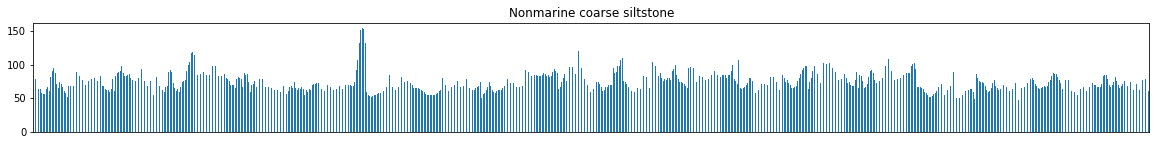

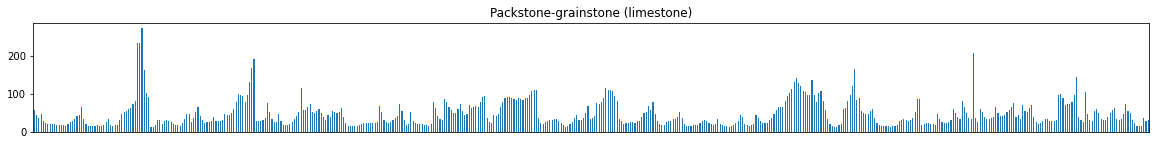

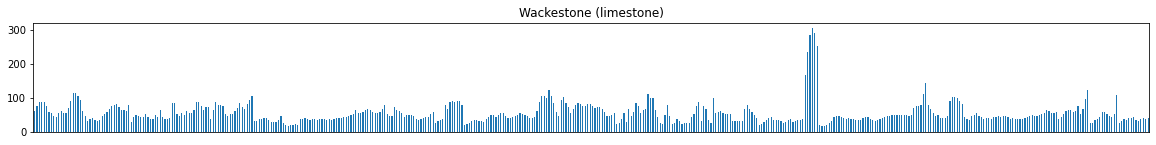

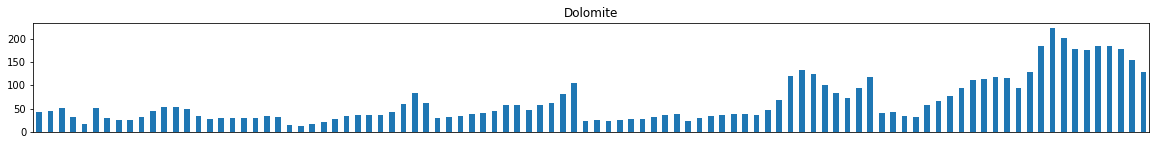

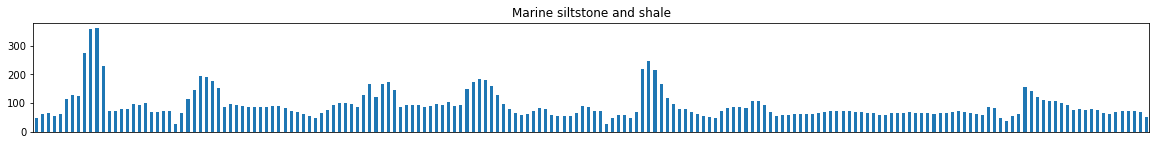

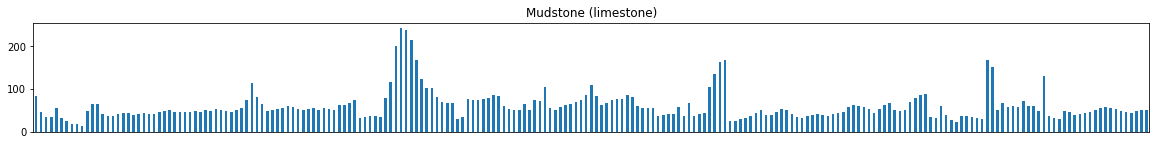

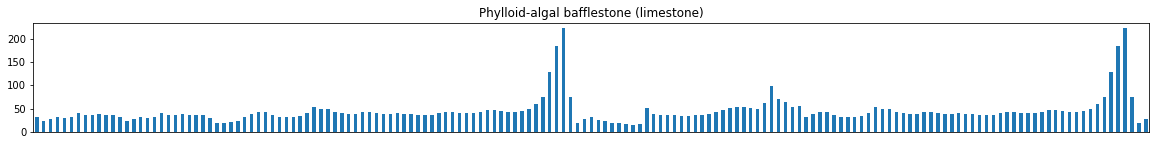

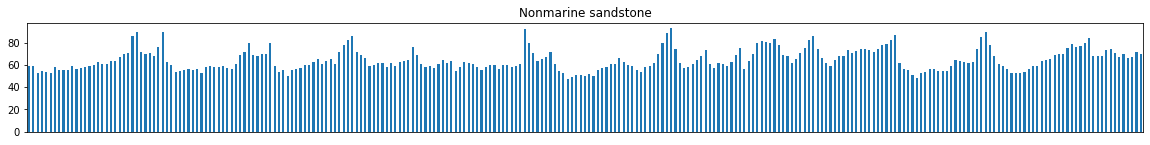

In [177]:
#plt.scatter(x=x,y=X_train["GR"])
print("Gamma ray logs are used primarily to distinguish clean, potentially productive intervals from probable unproductive shale intervals. The measurement is used to locate shale beds and quantify shale volume. Clay minerals are formed from the decomposition of igneous rock.")
PlotBar("GR")

A gamma ray interaction in which the gamma ray is fully absorbed by a bound electron. If the energy transferred exceeds the binding energy to the atom, the electron will be ejected. Normally, the ejected electron will be replaced within the material and a characteristic X-ray will be emitted with an energy that is dependent on the atomic number of the material.

 In general the trend toward higher radioactivity increase with shale content. At the high radioactivity extreme are organic-rich shales and potash (KCl). 


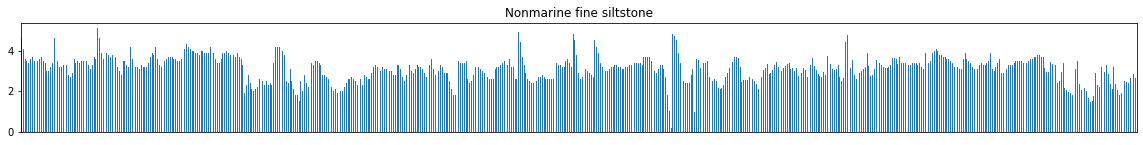

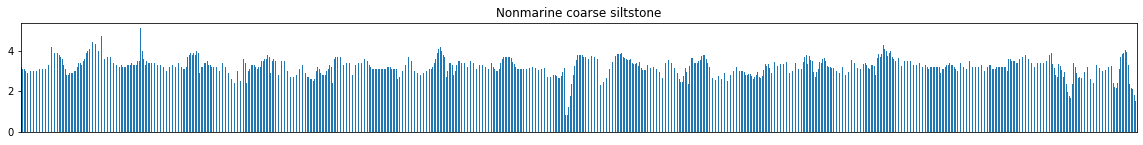

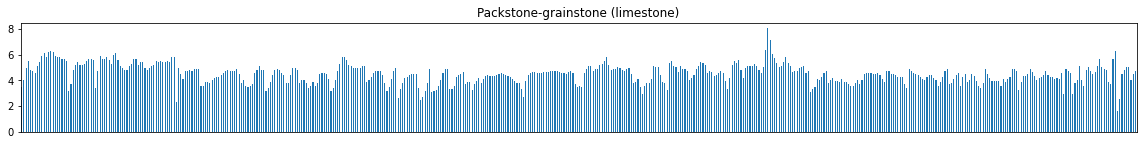

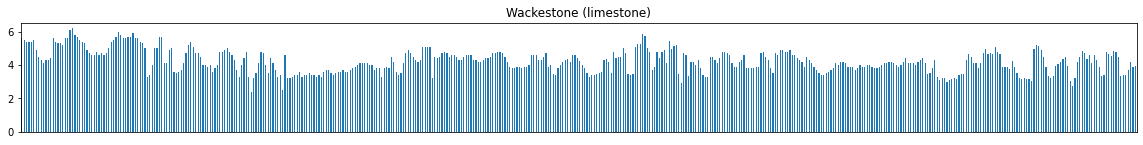

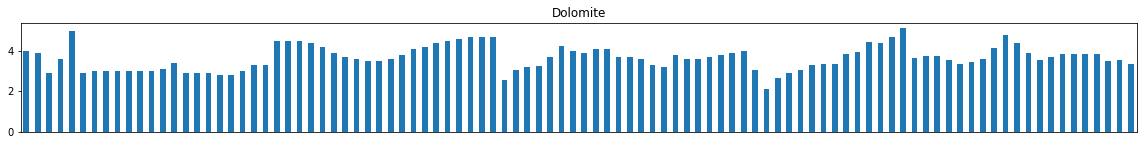

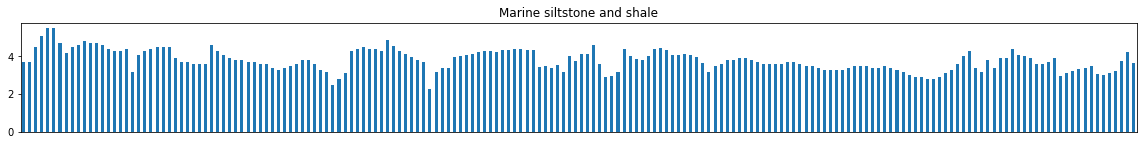

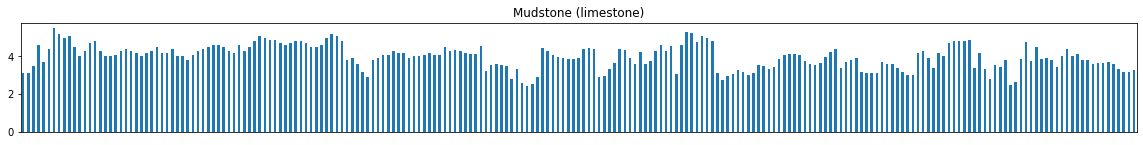

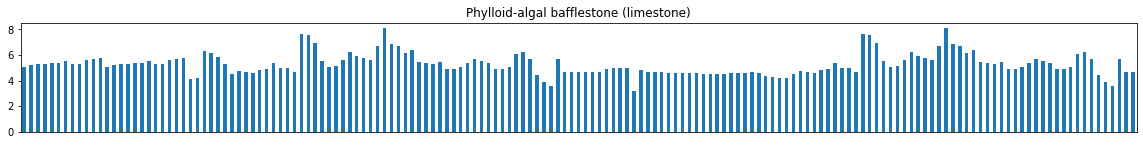

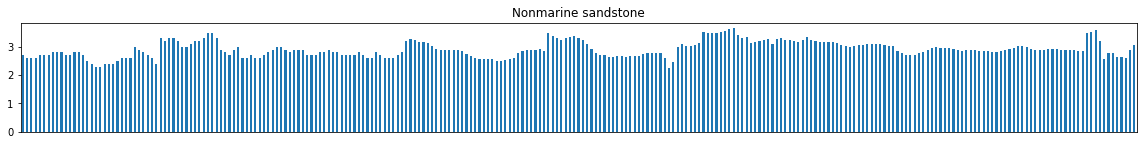

In [178]:
#plt.scatter(x=x,y=X_train["PE"])
print("A gamma ray interaction in which the gamma ray is fully absorbed by a bound electron. If the energy transferred exceeds the binding energy to the atom, the electron will be ejected. Normally, the ejected electron will be replaced within the material and a characteristic X-ray will be emitted with an energy that is dependent on the atomic number of the material.")
print("\n In general the trend toward higher radioactivity increase with shale content. At the high radioactivity extreme are organic-rich shales and potash (KCl). ")
PlotBar("PE")

In [179]:
#https://medium.com/geekculture/svm-classification-with-sklearn-svm-svc-how-to-plot-a-decision-boundary-with-margins-in-2d-space-7232cb3962c0
#https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html

In [185]:
#plt.figure(figsize=(10, 8))
# Plotting our two-features-space
#sns.scatterplot(x=X_train.iloc[:, 0], 
#                y=X_train.iloc[:, 1], 
#                hue=y_train, 
#                s=8);

In [190]:
#X = np.array(df[columns].values)
#y = np.array(df["Facies"].values)#plt.scatter(X[:, 2], y,c=y)
#plt.ylabel('Facies')
#plt.title('Shapes')
#plt.legend()
#print(columns[1])

In [191]:
X = df[columns].values
y = pd.get_dummies(df["Facies"].values)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)


In [199]:


model=Sequential()

model.add(Dense(540, input_shape=(len(columns),),activation='LeakyReLU'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(480, activation='LeakyReLU'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(440, activation='LeakyReLU'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(62, activation='LeakyReLU'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='LeakyReLU'))
model.add(Dense(len(y.columns)))

model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])


print(model.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 540)               17280     
                                                                 
 batch_normalization_21 (Bat  (None, 540)              2160      
 chNormalization)                                                
                                                                 
 dropout_29 (Dropout)        (None, 540)               0         
                                                                 
 dense_48 (Dense)            (None, 480)               259680    
                                                                 
 batch_normalization_22 (Bat  (None, 480)              1920      
 chNormalization)                                                
                                                                 
 dropout_30 (Dropout)        (None, 480)             

Epoch 1/800
71/71 [==============================] - 1s 13ms/step - loss: 2.6691 - accuracy: 0.1247
Epoch 2/800
71/71 [==============================] - 1s 13ms/step - loss: 2.6482 - accuracy: 0.1313
Epoch 3/800
71/71 [==============================] - 1s 13ms/step - loss: 2.5736 - accuracy: 0.1463
Epoch 4/800
71/71 [==============================] - 1s 14ms/step - loss: 2.5568 - accuracy: 0.1508
Epoch 5/800
71/71 [==============================] - 1s 14ms/step - loss: 2.4442 - accuracy: 0.1667
Epoch 6/800
71/71 [==============================] - 1s 14ms/step - loss: 2.4678 - accuracy: 0.1636
Epoch 7/800
71/71 [==============================] - 1s 13ms/step - loss: 2.3782 - accuracy: 0.1773
Epoch 8/800
71/71 [==============================] - 1s 14ms/step - loss: 2.3480 - accuracy: 0.1932
Epoch 9/800
71/71 [==============================] - 1s 14ms/step - loss: 2.3219 - accuracy: 0.2060
Epoch 10/800
71/71 [==============================] - 1s 14ms/step - loss: 2.2505 - accuracy: 0.2056

71/71 [==============================] - 1s 14ms/step - loss: 1.1945 - accuracy: 0.5495
Epoch 83/800
71/71 [==============================] - 1s 14ms/step - loss: 1.1659 - accuracy: 0.5592
Epoch 84/800
71/71 [==============================] - 1s 14ms/step - loss: 1.1870 - accuracy: 0.5438
Epoch 85/800
71/71 [==============================] - 1s 14ms/step - loss: 1.1515 - accuracy: 0.5482
Epoch 86/800
71/71 [==============================] - 1s 12ms/step - loss: 1.1716 - accuracy: 0.5588
Epoch 87/800
71/71 [==============================] - 1s 13ms/step - loss: 1.1786 - accuracy: 0.5548
Epoch 88/800
71/71 [==============================] - 1s 13ms/step - loss: 1.1565 - accuracy: 0.5597
Epoch 89/800
71/71 [==============================] - 1s 13ms/step - loss: 1.1441 - accuracy: 0.5539
Epoch 90/800
71/71 [==============================] - 1s 13ms/step - loss: 1.1601 - accuracy: 0.5659
Epoch 91/800
71/71 [==============================] - 1s 12ms/step - loss: 1.1475 - accuracy: 0.5663
Epo

71/71 [==============================] - 1s 14ms/step - loss: 0.9865 - accuracy: 0.6185
Epoch 163/800
71/71 [==============================] - 1s 13ms/step - loss: 1.0043 - accuracy: 0.6057
Epoch 164/800
71/71 [==============================] - 1s 13ms/step - loss: 0.9724 - accuracy: 0.6295
Epoch 165/800
71/71 [==============================] - 1s 13ms/step - loss: 0.9597 - accuracy: 0.6282
Epoch 166/800
71/71 [==============================] - 1s 14ms/step - loss: 0.9676 - accuracy: 0.6291
Epoch 167/800
71/71 [==============================] - 1s 14ms/step - loss: 0.9596 - accuracy: 0.6304
Epoch 168/800
71/71 [==============================] - 1s 14ms/step - loss: 0.9685 - accuracy: 0.6300
Epoch 169/800
71/71 [==============================] - 1s 14ms/step - loss: 0.9669 - accuracy: 0.6335
Epoch 170/800
71/71 [==============================] - 1s 14ms/step - loss: 0.9538 - accuracy: 0.6309
Epoch 171/800
71/71 [==============================] - 1s 14ms/step - loss: 0.9665 - accuracy: 0

71/71 [==============================] - 1s 13ms/step - loss: 0.8987 - accuracy: 0.6388
Epoch 243/800
71/71 [==============================] - 1s 13ms/step - loss: 0.8804 - accuracy: 0.6516
Epoch 244/800
71/71 [==============================] - 1s 15ms/step - loss: 0.8861 - accuracy: 0.6561
Epoch 245/800
71/71 [==============================] - 1s 13ms/step - loss: 0.8893 - accuracy: 0.6534
Epoch 246/800
71/71 [==============================] - 1s 13ms/step - loss: 0.8909 - accuracy: 0.6689
Epoch 247/800
71/71 [==============================] - 1s 12ms/step - loss: 0.8908 - accuracy: 0.6556
Epoch 248/800
71/71 [==============================] - 1s 12ms/step - loss: 0.8992 - accuracy: 0.6578
Epoch 249/800
71/71 [==============================] - 1s 12ms/step - loss: 0.8873 - accuracy: 0.6645
Epoch 250/800
71/71 [==============================] - 1s 12ms/step - loss: 0.8812 - accuracy: 0.6516
Epoch 251/800
71/71 [==============================] - 1s 12ms/step - loss: 0.9066 - accuracy: 0

71/71 [==============================] - 1s 12ms/step - loss: 0.8536 - accuracy: 0.6715
Epoch 323/800
71/71 [==============================] - 1s 12ms/step - loss: 0.8663 - accuracy: 0.6645
Epoch 324/800
71/71 [==============================] - 1s 13ms/step - loss: 0.8340 - accuracy: 0.6715
Epoch 325/800
71/71 [==============================] - 1s 12ms/step - loss: 0.8340 - accuracy: 0.6804
Epoch 326/800
71/71 [==============================] - 1s 12ms/step - loss: 0.8557 - accuracy: 0.6715
Epoch 327/800
71/71 [==============================] - 1s 12ms/step - loss: 0.8382 - accuracy: 0.6790
Epoch 328/800
71/71 [==============================] - 1s 12ms/step - loss: 0.8540 - accuracy: 0.6711
Epoch 329/800
71/71 [==============================] - 1s 12ms/step - loss: 0.8361 - accuracy: 0.6658
Epoch 330/800
71/71 [==============================] - 1s 12ms/step - loss: 0.8495 - accuracy: 0.6746
Epoch 331/800
71/71 [==============================] - 1s 12ms/step - loss: 0.8533 - accuracy: 0

71/71 [==============================] - 1s 12ms/step - loss: 0.8149 - accuracy: 0.6760
Epoch 403/800
71/71 [==============================] - 1s 13ms/step - loss: 0.8061 - accuracy: 0.6892
Epoch 404/800
71/71 [==============================] - 1s 12ms/step - loss: 0.8097 - accuracy: 0.6821
Epoch 405/800
71/71 [==============================] - 1s 13ms/step - loss: 0.7996 - accuracy: 0.6839
Epoch 406/800
71/71 [==============================] - 1s 13ms/step - loss: 0.8099 - accuracy: 0.6857
Epoch 407/800
71/71 [==============================] - 1s 13ms/step - loss: 0.8219 - accuracy: 0.6790
Epoch 408/800
71/71 [==============================] - 1s 12ms/step - loss: 0.8012 - accuracy: 0.6936
Epoch 409/800
71/71 [==============================] - 1s 12ms/step - loss: 0.7895 - accuracy: 0.6994
Epoch 410/800
71/71 [==============================] - 1s 13ms/step - loss: 0.8042 - accuracy: 0.6901
Epoch 411/800
71/71 [==============================] - 1s 17ms/step - loss: 0.7830 - accuracy: 0

71/71 [==============================] - 1s 13ms/step - loss: 0.7861 - accuracy: 0.7065
Epoch 483/800
71/71 [==============================] - 1s 13ms/step - loss: 0.7665 - accuracy: 0.7047
Epoch 484/800
71/71 [==============================] - 1s 13ms/step - loss: 0.7945 - accuracy: 0.7025
Epoch 485/800
71/71 [==============================] - 1s 13ms/step - loss: 0.7880 - accuracy: 0.6883
Epoch 486/800
71/71 [==============================] - 1s 13ms/step - loss: 0.7787 - accuracy: 0.6967
Epoch 487/800
71/71 [==============================] - 1s 12ms/step - loss: 0.7851 - accuracy: 0.6919
Epoch 488/800
71/71 [==============================] - 1s 12ms/step - loss: 0.7779 - accuracy: 0.6981
Epoch 489/800
71/71 [==============================] - 1s 12ms/step - loss: 0.7760 - accuracy: 0.6967
Epoch 490/800
71/71 [==============================] - 1s 12ms/step - loss: 0.7699 - accuracy: 0.6998
Epoch 491/800
71/71 [==============================] - 1s 12ms/step - loss: 0.7663 - accuracy: 0

71/71 [==============================] - 1s 14ms/step - loss: 0.7517 - accuracy: 0.6989
Epoch 563/800
71/71 [==============================] - 1s 14ms/step - loss: 0.7770 - accuracy: 0.6932
Epoch 564/800
71/71 [==============================] - 1s 14ms/step - loss: 0.7736 - accuracy: 0.6932
Epoch 565/800
71/71 [==============================] - 1s 15ms/step - loss: 0.7482 - accuracy: 0.7113
Epoch 566/800
71/71 [==============================] - 1s 14ms/step - loss: 0.7788 - accuracy: 0.6963
Epoch 567/800
71/71 [==============================] - 1s 13ms/step - loss: 0.7568 - accuracy: 0.7047
Epoch 568/800
71/71 [==============================] - 1s 13ms/step - loss: 0.7435 - accuracy: 0.7140
Epoch 569/800
71/71 [==============================] - 1s 13ms/step - loss: 0.7593 - accuracy: 0.7020
Epoch 570/800
71/71 [==============================] - 1s 12ms/step - loss: 0.7570 - accuracy: 0.7073
Epoch 571/800
71/71 [==============================] - 1s 12ms/step - loss: 0.7542 - accuracy: 0

71/71 [==============================] - 1s 12ms/step - loss: 0.7267 - accuracy: 0.7095
Epoch 643/800
71/71 [==============================] - 1s 12ms/step - loss: 0.7281 - accuracy: 0.7144
Epoch 644/800
71/71 [==============================] - 1s 13ms/step - loss: 0.7341 - accuracy: 0.7144
Epoch 645/800
71/71 [==============================] - 1s 13ms/step - loss: 0.7294 - accuracy: 0.7188
Epoch 646/800
71/71 [==============================] - 1s 13ms/step - loss: 0.7480 - accuracy: 0.7034
Epoch 647/800
71/71 [==============================] - 1s 13ms/step - loss: 0.7316 - accuracy: 0.7082
Epoch 648/800
71/71 [==============================] - 1s 13ms/step - loss: 0.7286 - accuracy: 0.7157
Epoch 649/800
71/71 [==============================] - 1s 12ms/step - loss: 0.7431 - accuracy: 0.7140
Epoch 650/800
71/71 [==============================] - 1s 14ms/step - loss: 0.7379 - accuracy: 0.7011
Epoch 651/800
71/71 [==============================] - 1s 13ms/step - loss: 0.7266 - accuracy: 0

71/71 [==============================] - 1s 12ms/step - loss: 0.6998 - accuracy: 0.7250
Epoch 723/800
71/71 [==============================] - 1s 13ms/step - loss: 0.7125 - accuracy: 0.7206
Epoch 724/800
71/71 [==============================] - 1s 12ms/step - loss: 0.7032 - accuracy: 0.7268
Epoch 725/800
71/71 [==============================] - 1s 12ms/step - loss: 0.7253 - accuracy: 0.7100
Epoch 726/800
71/71 [==============================] - 1s 12ms/step - loss: 0.7303 - accuracy: 0.7153
Epoch 727/800
71/71 [==============================] - 1s 12ms/step - loss: 0.7143 - accuracy: 0.7250
Epoch 728/800
71/71 [==============================] - 1s 12ms/step - loss: 0.7063 - accuracy: 0.7241
Epoch 729/800
71/71 [==============================] - 1s 13ms/step - loss: 0.7049 - accuracy: 0.7250
Epoch 730/800
71/71 [==============================] - 1s 11ms/step - loss: 0.6980 - accuracy: 0.7233
Epoch 731/800
71/71 [==============================] - 1s 12ms/step - loss: 0.7129 - accuracy: 0

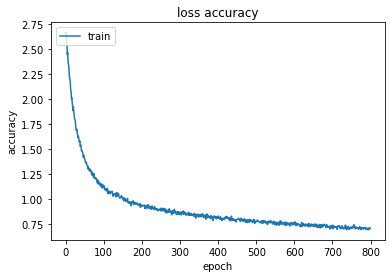

In [201]:
history=model.fit(X_train, y_train,epochs = 800,verbose=1)

model.evaluate(X_test, y_test)

plt.plot(history.history['loss'])
plt.title('loss accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [196]:
y_svm_pred_text=svm.predict(X_train[0:50])
#cm = confusion_matrix(y_train[0:100], y_svm_pred_text)

C:\Users\dnishimoto\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


50 50
50 50


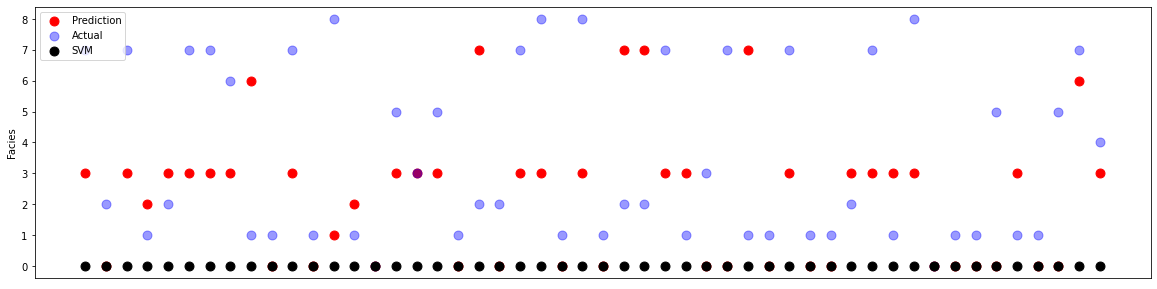

Matches occur when the red doc and blue dot overlap per interval of x.


In [198]:
y_pred_test = model.predict(X_train[0:50], verbose=0)


#print(y_train)
#print(y_pred_test)
y_pred_result=np.argmax(y_pred_test,axis=1)
#for index,item in enumerate(y_pred_test):
#    y_pred_result.append(np.argmax(item))
#print(y_result)

y_actual_result=[]
#print(y_train)
for index, item in y_train[0:50].iterrows():
    y_actual_result.append(np.argmax(item))
    

y_pred_svm_result=[]
for index,item in enumerate(y_svm_pred_text):
    y_pred_svm_result.append(np.argmax(item))

plt.figure(figsize=(20,5))

x=np.linspace(0,len(y_pred_result),len(y_pred_result))
print(len(x),len(y_pred_result))
print(len(x),len(y_actual_result))
plt.scatter(x=x,y=y_pred_result, color='red', label='Prediction',s=80)
plt.scatter(x=x,y=y_actual_result, color='blue', label='Actual',s=80, alpha=.4)
plt.scatter(x=x,y=y_pred_svm_result, color='black', label='SVM',s=80)

#plt.scatter(x=X_train[0:6000],y=y_pred_test, color='red', label='Prediction')
#plt.scatter(x=X_train[0:6000], y=y_train[0:6000], color='blue', label='Ground Truth')
plt.ylabel("Facies")
plt.xticks([])
plt.legend(loc='upper left')
plt.show()

print("Matches occur when the red doc and blue dot overlap per interval of x.")